# Analysis of a classification dataset

## Notebook stuff

In [168]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
%autoreload 2

## Load the data

In [170]:
import pandas as pd

In [171]:
train = pd.read_csv('data/processed/train.csv')

In [172]:
train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.10,0.0,0.10,0.00,0.40,0.10,0.1,0.0,0.20,0.2,...,0.000,0.093,0.000,0.297,0.156,0.0,6.800,494,1428,1
1,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.000,0.600,0.000,0.000,0.000,0.0,2.526,11,48,0
2,0.00,0.0,0.34,0.00,0.34,0.00,0.0,0.0,0.34,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.583,6,95,0
3,0.03,0.0,0.03,0.13,0.06,0.03,0.0,0.0,0.32,0.0,...,0.226,0.235,0.181,0.000,0.009,0.0,2.754,34,2688,0
4,0.00,0.0,0.00,0.00,0.10,0.00,0.0,0.0,0.00,0.0,...,0.140,0.500,0.093,0.000,0.000,0.0,4.060,51,1003,0


Scale the data

In [173]:
x_cols = train.columns[:-1]
y_col = train.columns[-1]

In [174]:
val = pd.read_csv('data/processed/val.csv')

Scaler to standardize the data

In [175]:
from utility import Scaler

In [176]:
scaler = Scaler().fit(train[x_cols])

## Create a network

In [177]:
from nnAsA import NN

In [178]:
net = NN(ninputs=len(x_cols), nhidden=25, noutput=1)

Random initialized errors

In [179]:
net.rmse(scaler.transform(val[x_cols]), val[y_col])

13.778872882755051

In [180]:
val_errors = []
train_errors = []

for row in range(train.shape[0]):
    val_errors.append(net.rmse(scaler.transform(val[x_cols]), val[y_col]))
    train_errors.append(net.fit(scaler.transform(train[x_cols].loc[row]), train[y_col].loc[row], lr=0.001))

In [181]:
import matplotlib.pyplot as plt

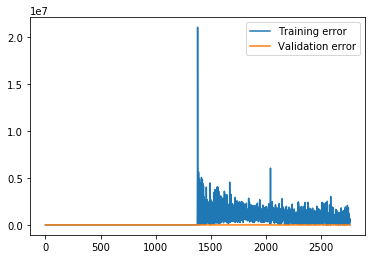

In [182]:
plt.plot(train_errors, label='Training error')
plt.plot(val_errors, label='Validation error')
plt.legend(loc='best')

In [183]:
net.rmse(val[x_cols], val[y_col])

934.4259080564719

In [184]:
net.v.shape

(26, 1)

## Now try with two columns for spam

In [185]:
len(val_errors)

2761

In [186]:
len(train_errors)

2761

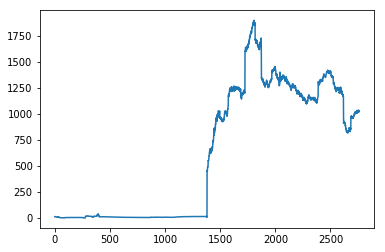

In [187]:
plt.plot(val_errors)

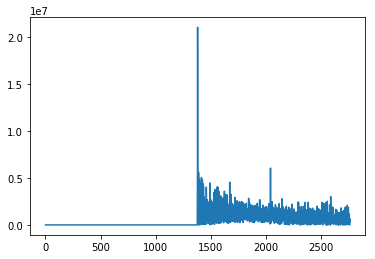

In [188]:
plt.plot(train_errors)

In [189]:
train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.10,0.0,0.10,0.00,0.40,0.10,0.1,0.0,0.20,0.2,...,0.000,0.093,0.000,0.297,0.156,0.0,6.800,494,1428,1
1,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.000,0.600,0.000,0.000,0.000,0.0,2.526,11,48,0
2,0.00,0.0,0.34,0.00,0.34,0.00,0.0,0.0,0.34,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.583,6,95,0
3,0.03,0.0,0.03,0.13,0.06,0.03,0.0,0.0,0.32,0.0,...,0.226,0.235,0.181,0.000,0.009,0.0,2.754,34,2688,0
4,0.00,0.0,0.00,0.00,0.10,0.00,0.0,0.0,0.00,0.0,...,0.140,0.500,0.093,0.000,0.000,0.0,4.060,51,1003,0


In [190]:
train['Not spam'] = 1 - train.spam

In [191]:
train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,Not spam
0,0.10,0.0,0.10,0.00,0.40,0.10,0.1,0.0,0.20,0.2,...,0.093,0.000,0.297,0.156,0.0,6.800,494,1428,1,0
1,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,...,0.600,0.000,0.000,0.000,0.0,2.526,11,48,0,1
2,0.00,0.0,0.34,0.00,0.34,0.00,0.0,0.0,0.34,0.0,...,0.000,0.000,0.000,0.000,0.0,1.583,6,95,0,1
3,0.03,0.0,0.03,0.13,0.06,0.03,0.0,0.0,0.32,0.0,...,0.235,0.181,0.000,0.009,0.0,2.754,34,2688,0,1
4,0.00,0.0,0.00,0.00,0.10,0.00,0.0,0.0,0.00,0.0,...,0.500,0.093,0.000,0.000,0.0,4.060,51,1003,0,1
